In [1]:
import logging.config
import os.path as op

import yaml

from agents.matchmanager import MatchManager
from agents.ml.regressor import RegressorAgent
from core.const import RED, BLUE
from scenarios import scenarioJunction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pickle

In [3]:
with open(op.join('.', 'logger.config.yaml'), 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)
logging.config.dictConfig(config)

In [4]:
def gameJunctionRegressorRegressor(seed:int) -> MatchManager:
    board, state = scenarioJunction()
    playerRed = RegressorAgent(RED, {'scenario': board.name, 'model': 'RandomForestRegressor', 'color': 'red'})
    playerBlue = RegressorAgent(BLUE, {'scenario': board.name, 'model': 'RandomForestRegressor', 'color': 'blue'})
    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=seed)
    while not mm.end:
        mm.nextStep()
    
    return mm

In [5]:
MM = gameJunctionRegressorRegressor(51)

2021-02-11 17:31:32 INFO SCENARIO: Junction
2021-02-11 17:31:32 INFO SEED:     51
2021-02-11 17:31:32 INFO blue : placed his troops in [ 39 147  99] (7.855555555555553)
2021-02-11 17:31:32 INFO ====================================================================================================
2021-02-11 17:31:32 INFO Turn 0
2021-02-11 17:31:40 INFO red   action   : RED  : rInf4     : Moved to (26, 37) 
2021-02-11 17:31:40 INFO blue  response : BLUE :: Pass in response 
2021-02-11 17:31:50 INFO blue  action   : BLUE : bInf1     : Moved to (35, 35) 
2021-02-11 17:31:50 INFO red   response : RED  : rInf3     : Attack bInf1 with Mortar in response (0 [10]/5): shell missed and hit (2, 1): 0 hit
2021-02-11 17:31:56 INFO red   action   : RED  : rInf3     : Attack bInf1 with Mortar success=(1 [16]/17) target=(0/4) KILLED!
2021-02-11 17:31:56 INFO blue  response : BLUE :: Pass in response 
2021-02-11 17:32:04 INFO blue  action   : BLUE : bInf2     : Moved to (35, 23) 
2021-02-11 17:32:04 INFO 

In [6]:
state0 = MM.states_history[0]

df_states = pd.DataFrame(
    columns=state0.vectorInfo(),
    data=[x.vector() for x in MM.states_history]
)

df_actions = pd.DataFrame(
    columns=state0.actionInfo(),
    data=[state0.creaAzione(x) for x in MM.actions_history]
)
df_red = MM.red.createDf(51)
df_blue = MM.blue.createDf(51)

In [7]:
def categoryAction(a):
    return {
        'PassFigure': 0.5,
        'Move': 0.75,
        'Attack': 1.0,
        'AttackRespond': 0.25,
        'PassRespond': 0.0,
    }[a]
    
    if a == 'Move':
        return 1.0
    if a == 'Attack':
        return 0.5
    if a == 'Attack':
        return 0.5
    return 0

df_red = df_red.set_index('Time')
df_blue = df_blue.set_index('Time')
df_red['Team'] = 'red'
df_blue['Team'] = 'blue'
df_red['Action'] = df_red['Mossa'].apply(lambda x: x.__class__.__name__)
df_red['CategoryAction'] = df_red['Action'].apply(categoryAction)
df_blue['Action'] = df_blue['Mossa'].apply(lambda x: x.__class__.__name__)
df_blue['CategoryAction'] = df_blue['Action'].apply(categoryAction)

In [8]:
df_states.to_pickle('df_RegrRegr_Seed50_states.pkl')
df_actions.to_pickle('df_RegrRegr_Seed50_actions.pkl')
df_red.to_pickle('df_RegrRegr_Seed50_red.pkl')
df_blue.to_pickle('df_RegrRegr_Seed50_blue.pkl')

In [9]:
dx = pd.concat([
    df_red[['Team', 'Mossa', 'Count', 'Action', 'CategoryAction']],
    df_blue[['Team', 'Mossa', 'Count', 'Action', 'CategoryAction']]
]).sort_index()

In [10]:
dx

,Team,Mossa,Count,Action,CategoryAction
Time,,,,,
2021-02-11 17:31:40.613402,red,"RED : rInf4 : Moved to (26, 37)",0,Move,0.75
2021-02-11 17:31:40.774344,blue,BLUE :: Pass in response,0,PassRespond,0.00
2021-02-11 17:31:50.613495,blue,"BLUE : bInf1 : Moved to (35, 35)",1,Move,0.75
2021-02-11 17:31:50.837350,red,RED : rInf3 : Attack bInf1 with Mortar in...,1,AttackRespond,0.25
2021-02-11 17:31:56.870484,red,RED : rInf3 : Attack bInf1 with Mortar,2,Attack,1.00
2021-02-11 17:31:56.983475,blue,BLUE :: Pass in response,2,PassRespond,0.00
2021-02-11 17:32:04.821119,blue,"BLUE : bInf2 : Moved to (35, 23)",3,Move,0.75
2021-02-11 17:32:04.881646,red,RED :: Pass in response,3,PassRespond,0.00
2021-02-11 17:32:08.975498,red,RED : rTank3 : Pass,4,PassFigure,0.50


In [11]:
{
    'PassFigure': 0.5,
    'Move': 0.75,
    'Attack': 1.0,
    'AttackRespond': 0.25,
    'PassRespond': 0.0,
}

{'PassFigure': 0.5,
 'Move': 0.75,
 'Attack': 1.0,
 'AttackRespond': 0.25,
 'PassRespond': 0.0}

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd46946b9d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd46946b9d0>)

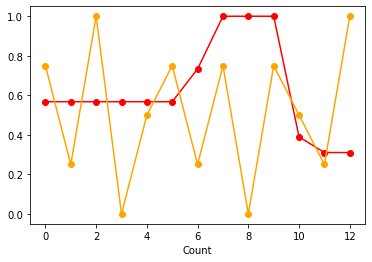

In [12]:
df_red.set_index('Count').Score.plot(color='red', marker='o'), df_red.set_index('Count').CategoryAction.plot(color='orange', marker='o'),

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd463e001d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd463e001d0>)

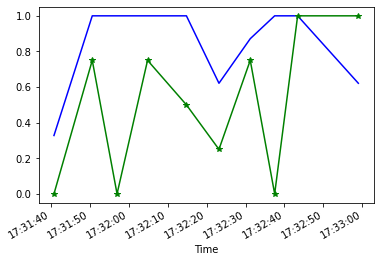

In [14]:
df_blue.Score.plot(color='blue'), df_blue.CategoryAction.plot(color='green', marker='*')

In [ ]:
MM.winner